In [4]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [5]:
CleanDataset = r'./Dataset/OnlineRetail.csv'
Data_new = pd.read_csv(CleanDataset, index_col = 'InvoiceDate')
Data_new.index = pd.to_datetime(Data_new.index, format = '%Y-%m-%d %H:%M')


In [6]:
sns.set_style('whitegrid')
Top20Quan = Data_new.groupby('Description')['Quantity'].agg('sum').sort_values(ascending=False)[0:20]
Top20Price = Data_new.groupby('Description')['FinalPrice'].agg('sum').sort_values(ascending=False)[0:20]


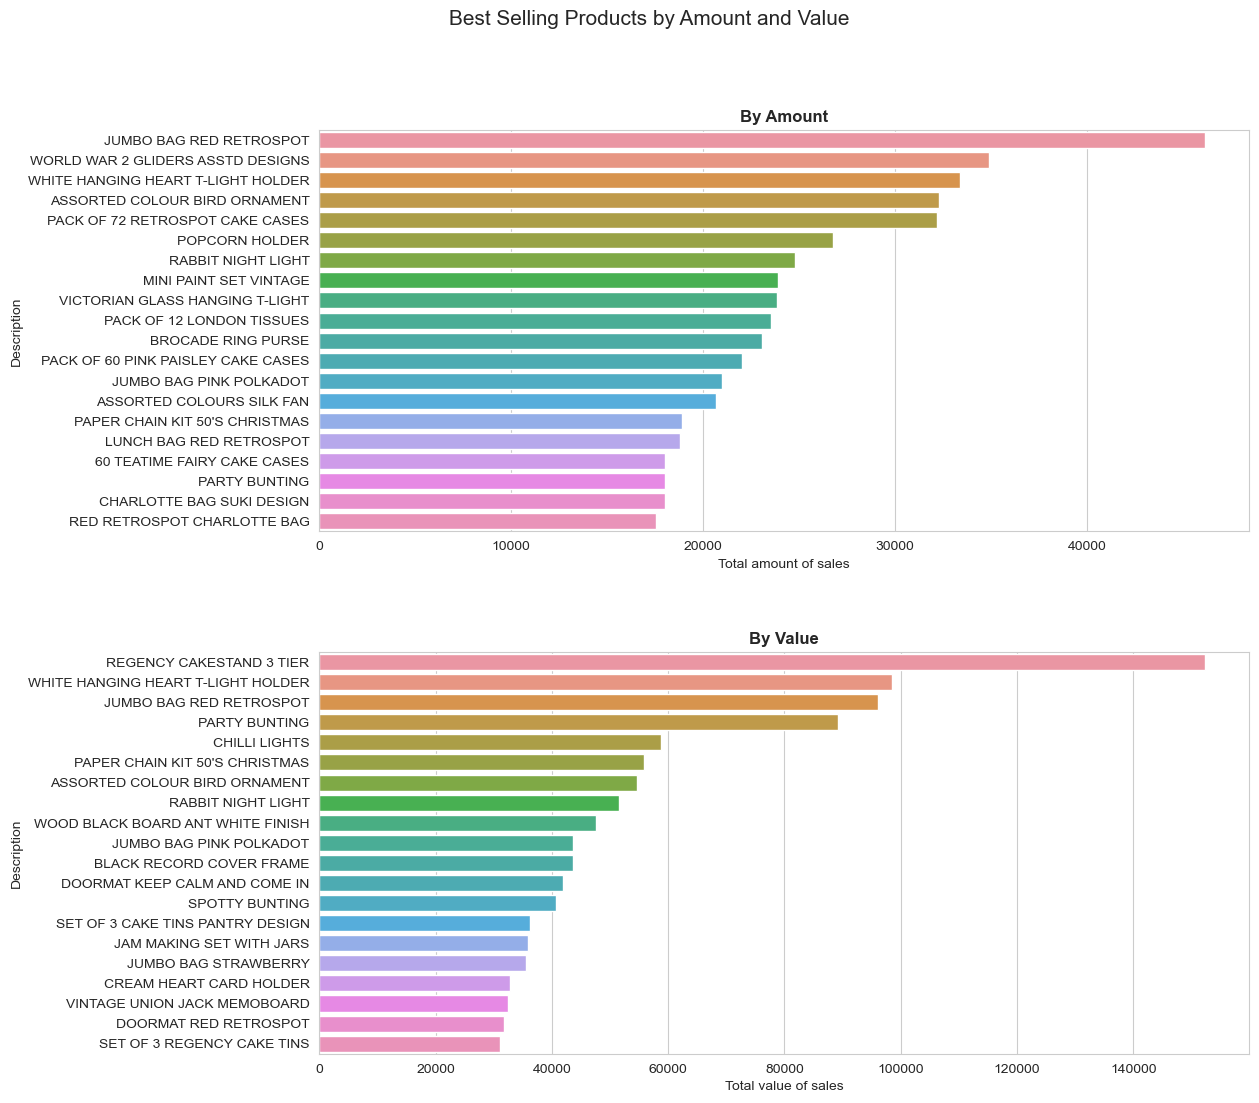

In [7]:
fig,axs = plt.subplots(nrows=2, ncols=1, figsize = (12,12))
plt.subplots_adjust(hspace = 0.3)
fig.suptitle('Best Selling Products by Amount and Value', fontsize=15, x = 0.4, y = 0.98)
sns.barplot(x=Top20Quan.values, y=Top20Quan.index, ax= axs[0]).set(xlabel='Total amount of sales')
axs[0].set_title('By Amount', size=12, fontweight = 'bold')
sns.barplot(x=Top20Price.values, y=Top20Price.index, ax= axs[1]).set(xlabel='Total value of sales')
axs[1].set_title('By Value', size=12, fontweight = 'bold')
plt.show()

In [8]:
ReturnedItems = Data_new[Data_new.Quantity<0].groupby('Description')['Quantity'].sum()
ReturnedItems = ReturnedItems.abs().sort_values(ascending=False)[0:10]
ReturnCust = Data_new[Data_new.Quantity<0].groupby(['CustomerID','Country'])['Quantity'].sum()
ReturnCust = ReturnCust.abs().sort_values(ascending=False)[0:10]


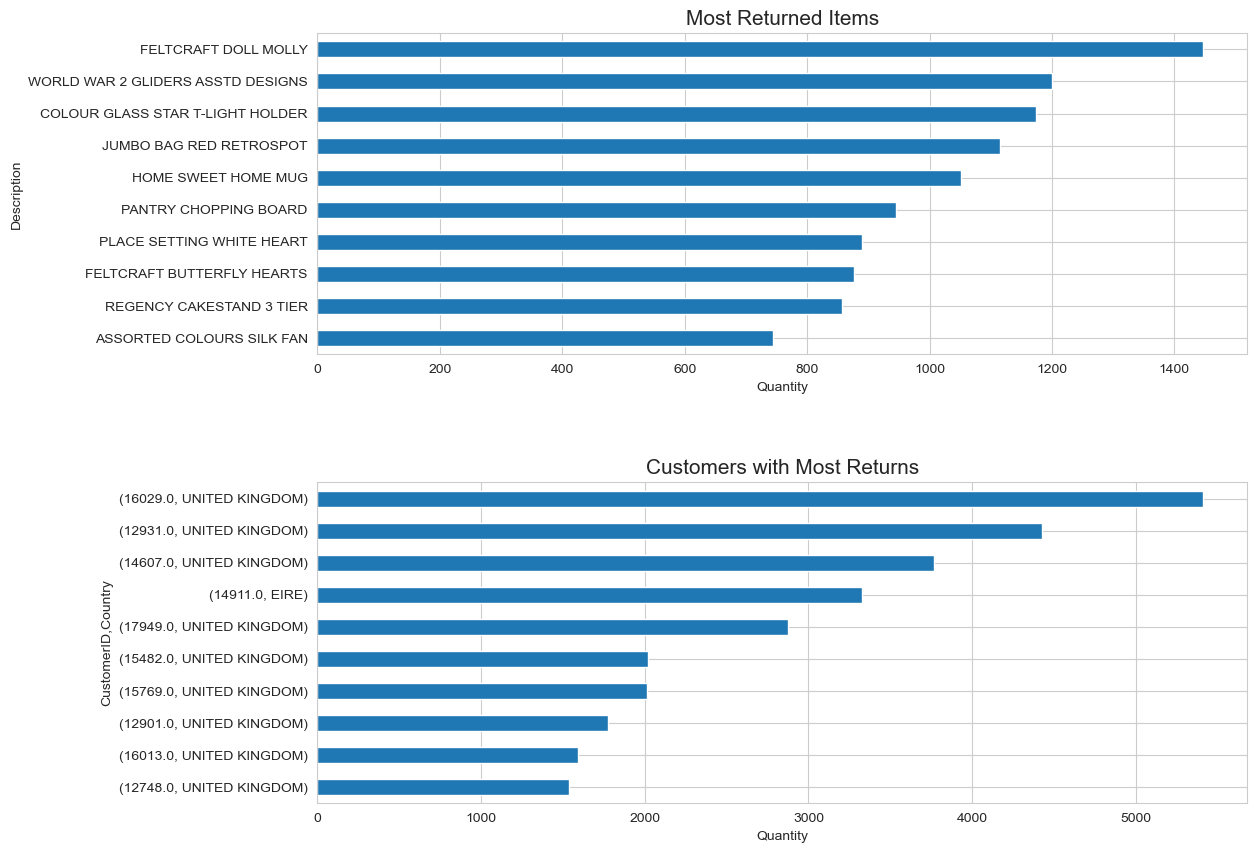

In [9]:
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=(12,10))
ReturnedItems.sort_values().plot(kind='barh', ax=ax1).set_title('Most Returned Items', fontsize=15)
ReturnCust.sort_values().plot(kind='barh', ax=ax2).set_title('Customers with Most Returns', fontsize=15)
ax1.set(xlabel='Quantity')
ax2.set(xlabel='Quantity')
plt.subplots_adjust(hspace=0.4)
plt.show()

In [10]:
#Corr = sns.jointplot(x="Quantity", y="UnitPrice", data = Data_new[Data_new.FinalPrice>0], height = 7)
#Corr.fig.suptitle("UnitPrice and Quantity Comparison", fontsize = 15, y = 1.1)
#plt.show()

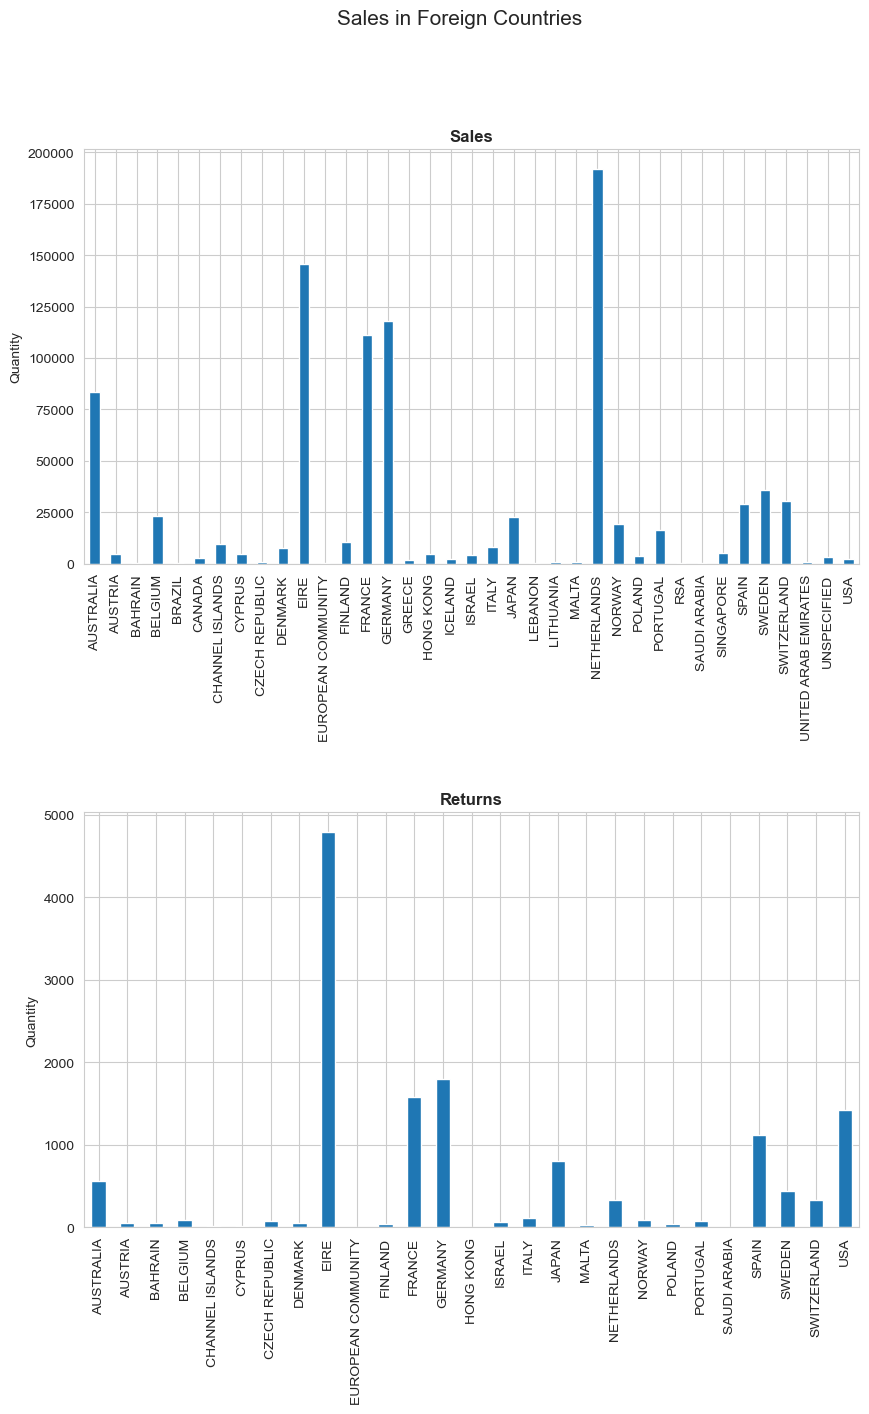

In [11]:
ByCountrySale = Data_new[(Data_new.Country != 'UNITED KINGDOM') & (Data_new.Quantity > 0)].groupby('Country')['Quantity'].sum()
ByCountryRet = Data_new[(Data_new.Country != 'UNITED KINGDOM') & (Data_new.Quantity < 0)].groupby('Country')['Quantity'].sum().abs()

fig, [ax1,ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10,14))
ByCountrySale.plot(kind='bar', ax=ax1).set(ylabel = 'Quantity',xlabel='')
ax1.set_title('Sales', size=12, fontweight = 'bold')
ByCountryRet.plot(kind='bar', ax=ax2).set(ylabel = 'Quantity',xlabel='')
ax2.set_title('Returns', size=12, fontweight = 'bold')
plt.suptitle('Sales in Foreign Countries', fontsize = 15)
plt.subplots_adjust(hspace = 0.6)
plt.show()

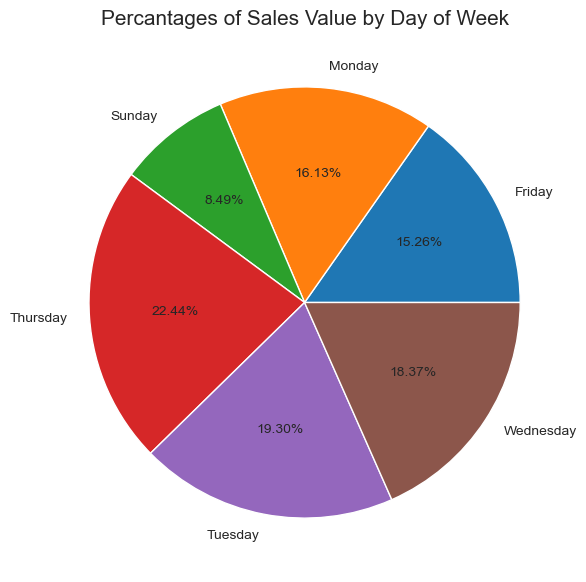

In [12]:
Data_new.groupby('Day of week')['FinalPrice'].sum().plot(kind = 'pie', autopct = '%.2f%%', figsize=(7,7)).set(ylabel='')
plt.title('Percantages of Sales Value by Day of Week', fontsize = 15)
plt.show()

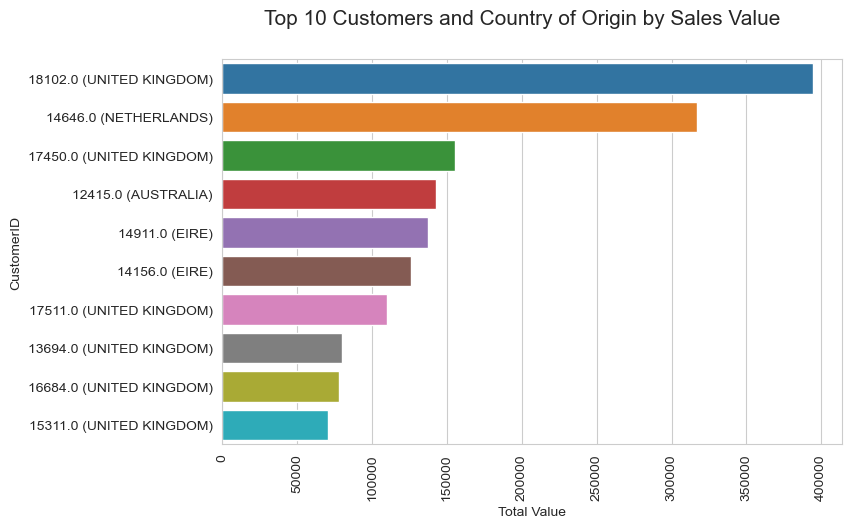

In [13]:
Top10Customers = Data_new.groupby(['CustomerID','Country'])['FinalPrice'].sum().sort_values(ascending=False)[0:10]
#creating the barplot
plt.figure(figsize=(8, 5))
sns.barplot(x=Top10Customers.values, y=[f'{id[0]} ({id[1]})' for id in Top10Customers.index]).set(xlabel='Total Value', ylabel='CustomerID')
plt.suptitle('Top 10 Customers and Country of Origin by Sales Value', fontsize=15)
plt.xticks(rotation=90)
plt.show()

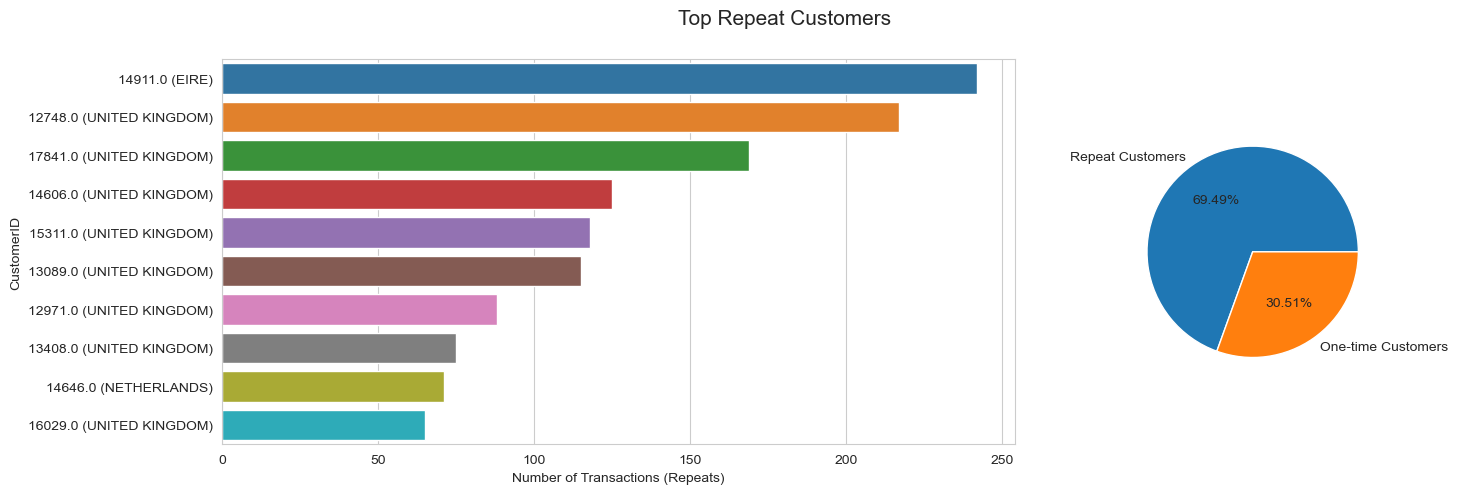

In [17]:
MostRepeat = Data_new.groupby(['CustomerID', 'Country'])['InvoiceNo'].nunique().sort_values(ascending=False)
rep = MostRepeat[MostRepeat != 1].values
nrep = MostRepeat[MostRepeat == 1].values
ser = pd.Series([len(rep) / (len(rep) + len(nrep)), len(nrep) / (len(rep) + len(nrep))], index=['Repeat Customers', 'One-time Customers'])

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), gridspec_kw={'width_ratios': [3, 1]})
plt.subplots_adjust(wspace=0.2)
sns.barplot(x=MostRepeat[:10].values, y=[f'{id[0]} ({id[1]})' for id in MostRepeat.index[:10]], ax=ax1).set(xlabel='Number of Transactions (Repeats)', ylabel='CustomerID')
ser.plot(kind='pie', autopct='%.2f%%', ax=ax2).set(ylabel='')
plt.suptitle('Top Repeat Customers', fontsize=15)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


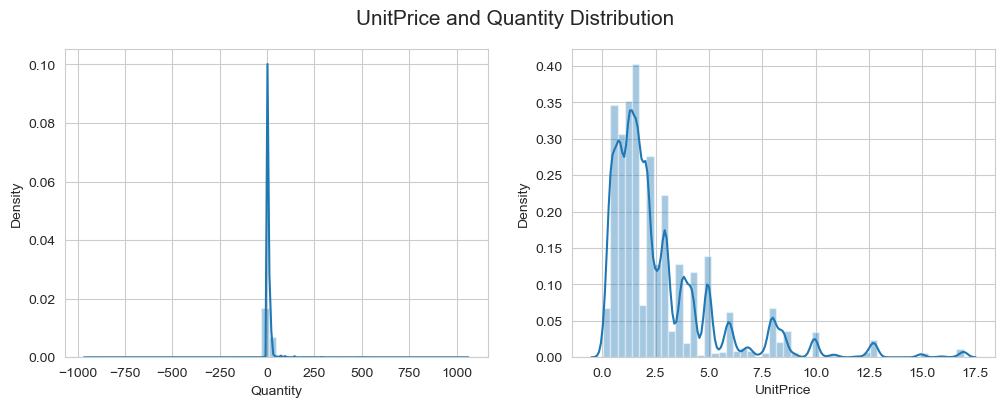

In [18]:
fig , [ax1,ax2] = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
with sns.axes_style('dark'):
    sns.distplot(Data_new['Quantity'], ax=ax1)
    sns.distplot(Data_new['UnitPrice'], ax=ax2)
fig.suptitle('UnitPrice and Quantity Distribution', fontsize = 15)
plt.show()

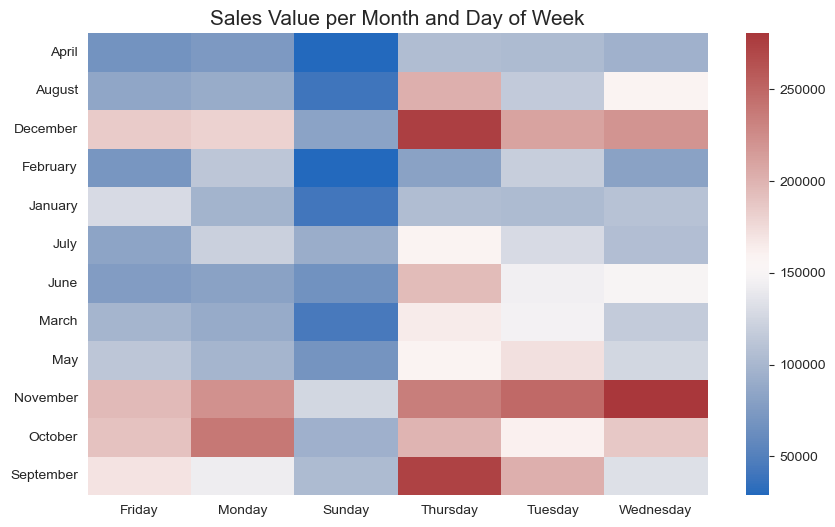

In [19]:
HM_Data = Data_new.pivot_table(index = 'InvoiceMonth',columns = 'Day of week', values = 'FinalPrice', aggfunc='sum')
plt.figure(figsize = (10,6))
sns.heatmap(HM_Data, cmap = 'vlag').set(xlabel='', ylabel='')
plt.title('Sales Value per Month and Day of Week', fontsize = 15)
plt.show()